In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
pd.DataFrame.rename()

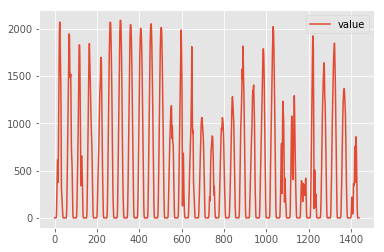

In [8]:
pd.read_csv('data/pv/pv_arso_forecast_junij.csv').plot(), pd.read_csv('data/pv/pv_arso_real_junij.csv').plot();

In [27]:
forecast_junij = pd.read_csv('data/pv/pv_arso_forecast_junij.csv', parse_dates=['datetime'])

In [78]:
forecast_junij.ffill(inplace=True)

In [79]:
forecast_junij.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 4 columns):
datetime    1439 non-null datetime64[ns]
value       1439 non-null float64
date        1439 non-null object
time        1439 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 45.0+ KB


In [80]:
forecast_junij['date'] = forecast_junij.datetime.dt.date

In [81]:
forecast_junij['time'] = forecast_junij.datetime.dt.time

In [85]:
df_pivoted = forecast_junij.pivot('date', 'time', 'value')
df_pivoted.replace(0, np.nan, inplace=True)
df_pivoted.dropna(axis=1, how='all', inplace=True)
df_pivoted.fillna(0.0, inplace=True)
df_pivoted.tail()

time        03:30:00  04:00:00    04:30:00  05:00:00    05:30:00  06:00:00  \
date                                                                         
2014-06-26  8.811999    31.272  112.195613   246.430  410.109867   601.380   
2014-06-27  5.943305    20.760   67.001647   142.340  231.634644   344.514   
2014-06-28  7.280604    25.700   89.494098   192.150  306.613992   442.134   
2014-06-29  5.788294    20.464   71.934069   155.611  250.716607   366.048   
2014-06-30  2.116950     7.698   32.381248    76.950  160.282149   220.160   

time          06:30:00  07:00:00     07:30:00  08:00:00    ...      15:00:00  \
date                                                       ...                 
2014-06-26  803.116430  1009.800  1210.366695  1400.749    ...       470.672   
2014-06-27  493.441098   661.227   833.764314   989.820    ...      1194.147   
2014-06-28  605.374616   774.254   926.464185  1061.730    ...      1428.686   
2014-06-29  510.727053   660.852   786.243902   905.398    ...      1073.358   
2014-06-30  165.337534    92.232    57.709908    41.392    ...       375.585   

time           15:30:00  16:00:00    16:30:00  17:00:00    17:30:00  18:00:00  \
date                                                                            
2014-06-26   283.801901   112.772  183.111500   253.341  216.886355   151.040   
2014-06-27  1079.200281   927.129  766.967358   601.200  441.078310   294.138   
2014-06-28  1258.089344  1065.792  869.714743   674.383  486.334237   317.394   
2014-06-29   902.717725   691.656  542.280300   411.640  292.339966   188.775   
2014-06-30   616.227500   856.800  799.209420   683.400  515.060092   329.853   

time          18:30:00  19:00:00   19:30:00  
date                                         
2014-06-26   70.199513    12.825   3.481719  
2014-06-27  158.219226    63.225  19.236081  
2014-06-28  165.931167    63.275  18.997345  
2014-06-29   92.783318    30.312   8.803352  
2014-06-30  175.842740    69.336  21.008064  

[5 rows x 33 columns]

In [37]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_features
from tsfresh import extract_relevant_features

In [38]:
extracted_features = extract_features(forecast_junij, column_id="date", column_sort="datetime")

Feature Extraction: 100%|██████████| 15/15 [00:00<00:00, 18.18it/s]


In [39]:
extracted_features.head()

variable    value__abs_energy  value__absolute_sum_of_changes  \
id                                                              
2014-06-01       3.711187e+07                        4615.338   
2014-06-02       4.339106e+07                        3959.284   
2014-06-03       3.038109e+07                        4284.480   
2014-06-04       3.676710e+07                        3684.366   
2014-06-05       3.232191e+07                        3389.568   

variable    value__agg_autocorrelation__f_agg_"mean"  \
id                                                     
2014-06-01                                 -0.025706   
2014-06-02                                 -0.032589   
2014-06-03                                 -0.033139   
2014-06-04                                 -0.035233   
2014-06-05                                 -0.031179   

variable    value__agg_autocorrelation__f_agg_"median"  \
id                                                       
2014-06-01                                    0.048683   
2014-06-02                                   -0.004327   
2014-06-03                                   -0.052790   
2014-06-04                                   -0.039509   
2014-06-05                                   -0.012238   

variable    value__agg_autocorrelation__f_agg_"var"  \
id                                                    
2014-06-01                                 0.370947   
2014-06-02                                 0.496224   
2014-06-03                                 0.375418   
2014-06-04                                 0.485814   
2014-06-05                                 0.476669   

variable    value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"  \
id                                                                                 
2014-06-01                                         894.748540                      
2014-06-02                                        1190.400278                      
2014-06-03                                        1113.814693                      
2014-06-04                                        1153.764698                      
2014-06-05                                         805.112050                      

variable    value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"  \
id                                                                              
2014-06-01                                          -0.013623                   
2014-06-02                                          -0.192304                   
2014-06-03                                          -0.230408                   
2014-06-04                                          -0.204368                   
2014-06-05                                           0.041342                   

variable    value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"  \
id                                                                             
2014-06-01                                          -7.395475                  
2014-06-02                                        -112.761533                  
2014-06-03                                        -126.825441                  
2014-06-04                                        -114.092136                  
2014-06-05                                          20.226904                  

variable    value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"  \
id                                                                              
2014-06-01                                         313.395686                   
2014-06-02                                         332.222362                   
2014-06-03                                         309.245387                   
2014-06-04                                         315.513395                   
2014-06-05                                         282.231288                   

variable    value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"in

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [50]:
scaler.fit_transform(extracted_features).shape

(30, 794)

In [ ]:
impute(extracted_features)

In [47]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=29)

In [57]:
X_pca = pca.fit_transform(X)

In [58]:
pca.explained_variance_ratio_

array([3.50944521e-01, 2.00256971e-01, 8.38337030e-02, 5.94234483e-02,
       5.48249390e-02, 4.21083336e-02, 2.77795895e-02, 2.30783189e-02,
       2.25442526e-02, 1.96835734e-02, 1.61836101e-02, 1.52546463e-02,
       1.30975451e-02, 1.11885464e-02, 1.01511076e-02, 8.46510392e-03,
       7.63750375e-03, 6.51804360e-03, 5.70046053e-03, 4.18493431e-03,
       3.86505171e-03, 3.23907092e-03, 3.02368371e-03, 1.86528532e-03,
       1.79111770e-03, 1.33926471e-03, 1.08802567e-03, 7.57006488e-04,
       1.72341835e-04])

In [86]:
#X = scaler.fit_transform(extracted_features)
#X = X_pca
X = scaler.fit_transform(df_pivoted)

For n_clusters = 2 The average silhouette_score is : 0.33428107628530607
For n_clusters = 3 The average silhouette_score is : 0.35666828431414355
For n_clusters = 4 The average silhouette_score is : 0.33321308627808544
For n_clusters = 5 The average silhouette_score is : 0.3241520740815417
For n_clusters = 6 The average silhouette_score is : 0.3123490151008896
For n_clusters = 7 The average silhouette_score is : 0.2986668331864506
For n_clusters = 8 The average silhouette_score is : 0.27363462373147
For n_clusters = 9 The average silhouette_score is : 0.2813772726937981
For n_clusters = 10 The average silhouette_score is : 0.26887906210254225
For n_clusters = 11 The average silhouette_score is : 0.27135128629415456
For n_clusters = 12 The average silhouette_score is : 0.24807541224199864
For n_clusters = 13 The average silhouette_score is : 0.2554411253084494
For n_clusters = 14 The average silhouette_score is : 0.2390216002577551


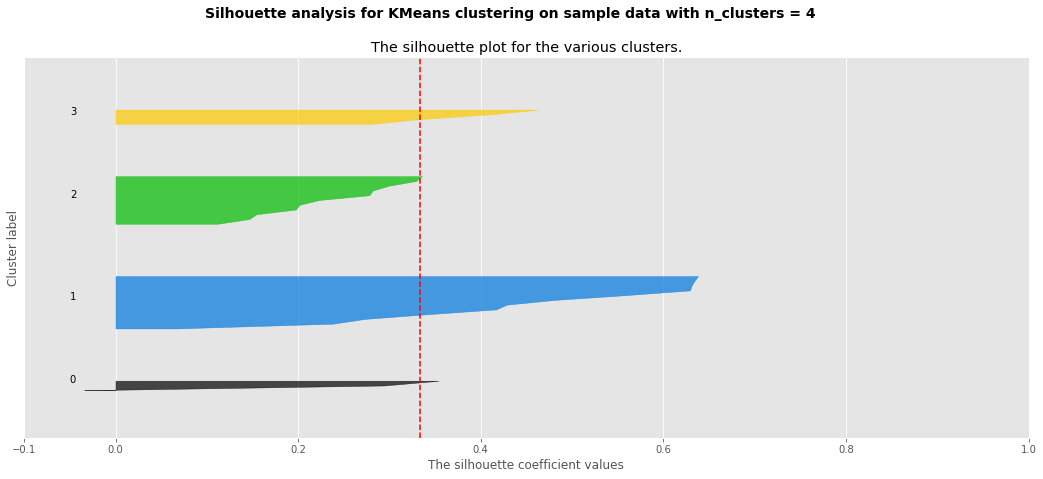

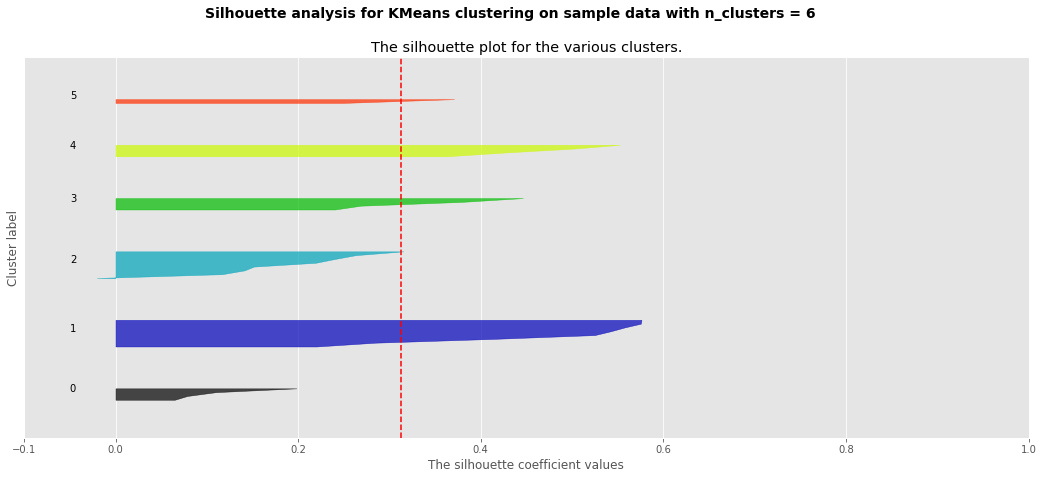

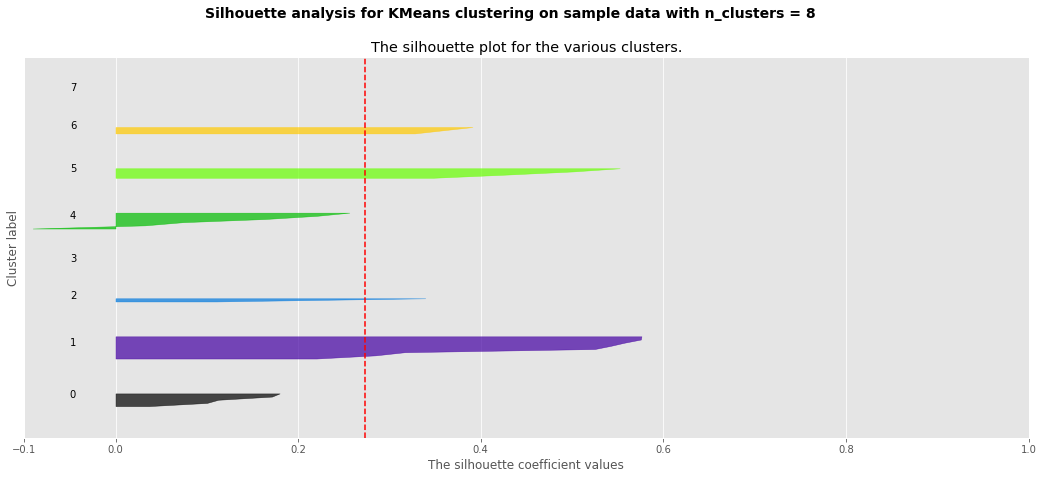

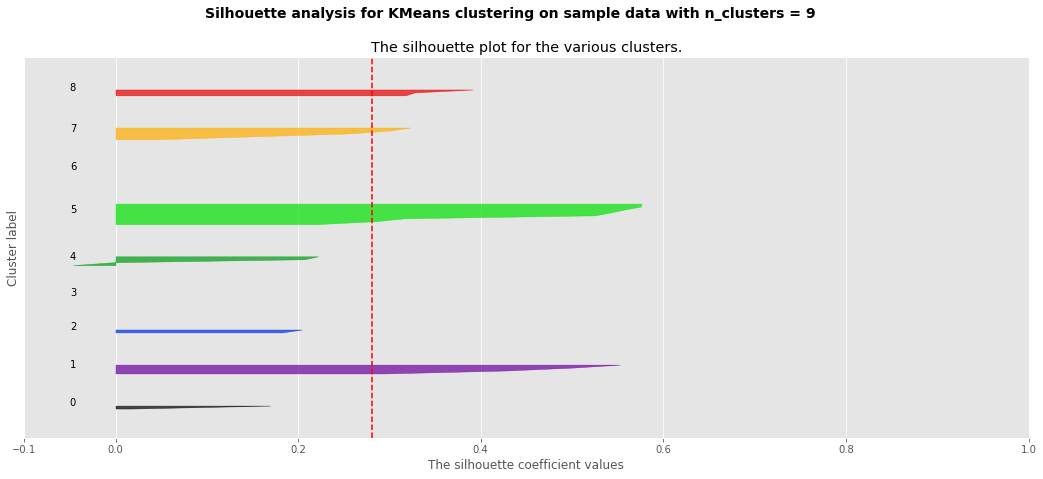

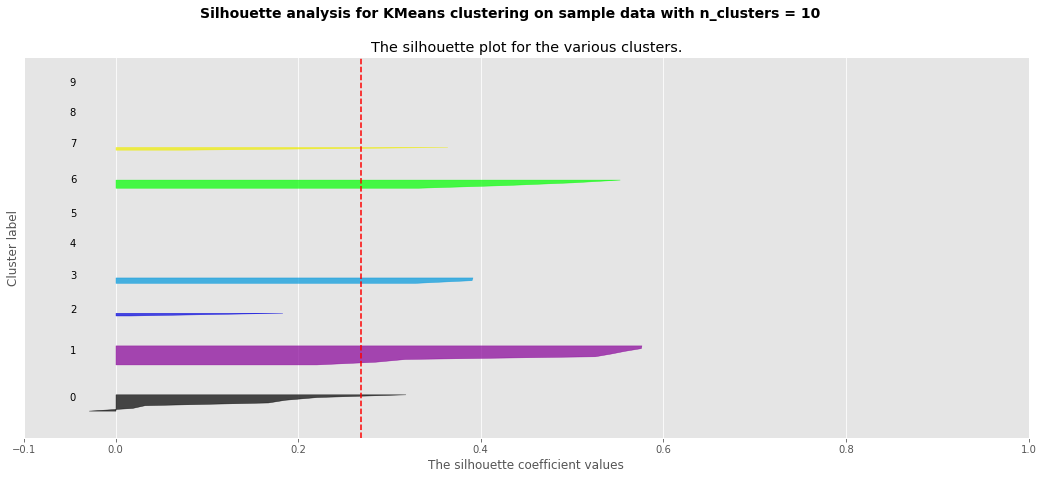

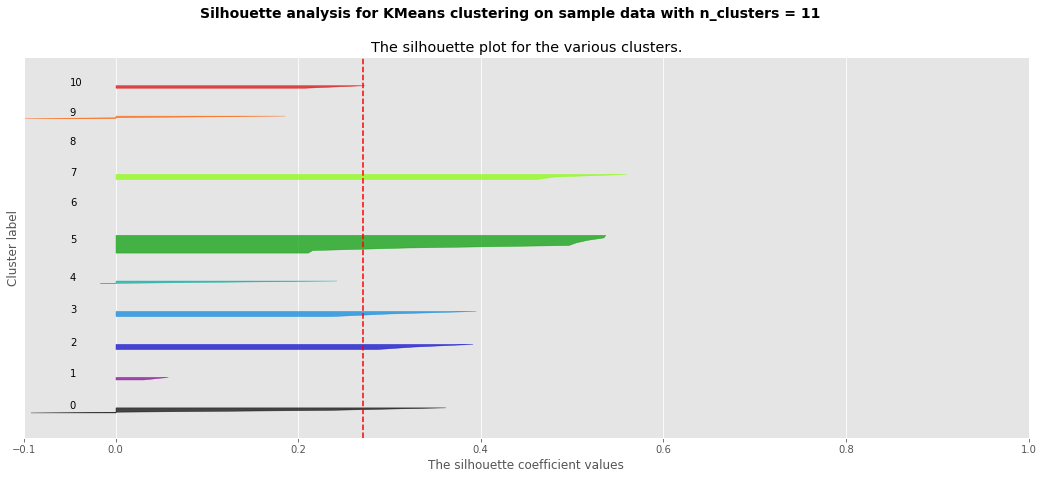

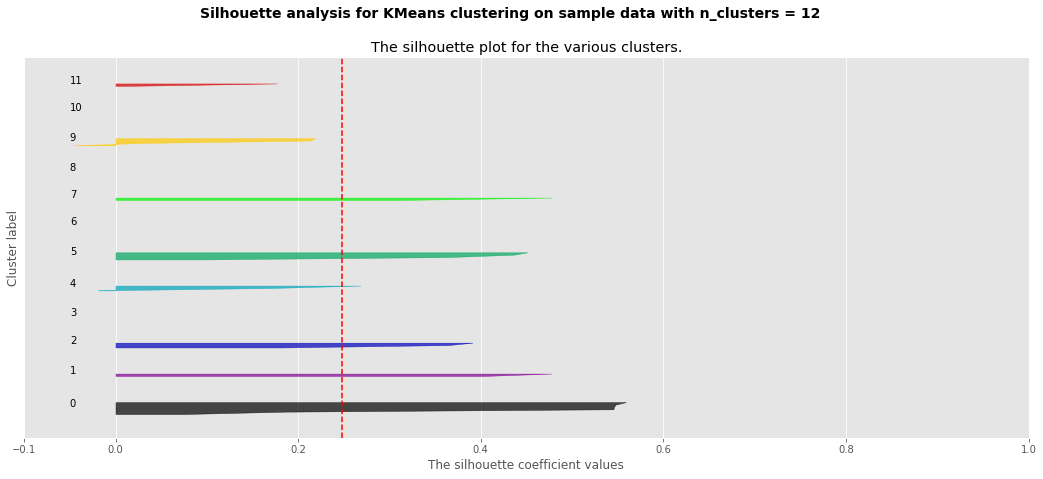

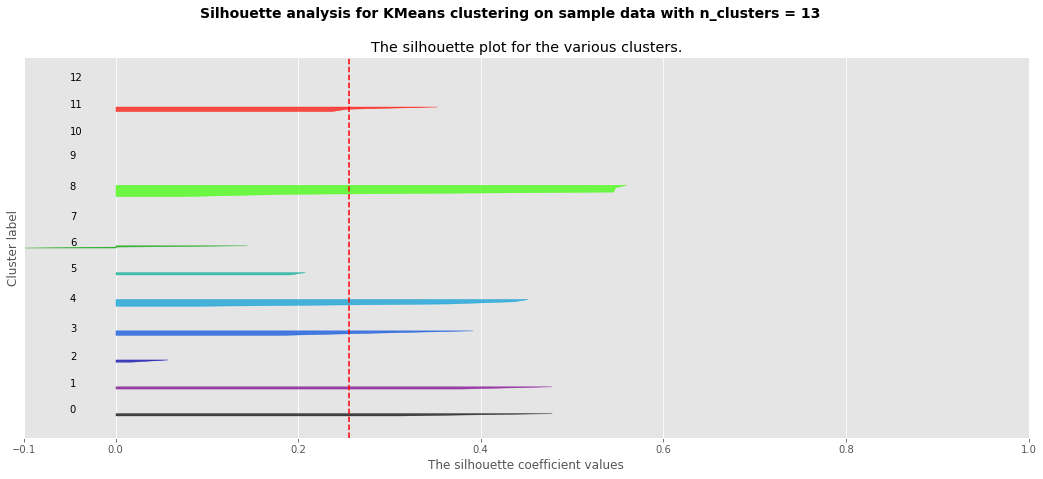

In [90]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2, 15)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')